<center><h1>IMPLEMENTATION</h1><br>SKELETIZATION & MEDIAL AXIS</center>

#### |setup

In [36]:
from PIL import Image, ImageFilter
import matplotlib.pyplot as plt
import skimage
from skimage.morphology import skeletonize, medial_axis
from skimage import data
import cv2
import numpy as np
from skimage.util import invert
from skimage.feature import greycomatrix, greycoprops
from skimage.color import rgb2gray
import os
import scipy.spatial.distance as dist

#### Test Skeletization

In [56]:
img = cv2.imread('./images/test/img_1.png', 2)
img = np.where(img <= 200, False, True)

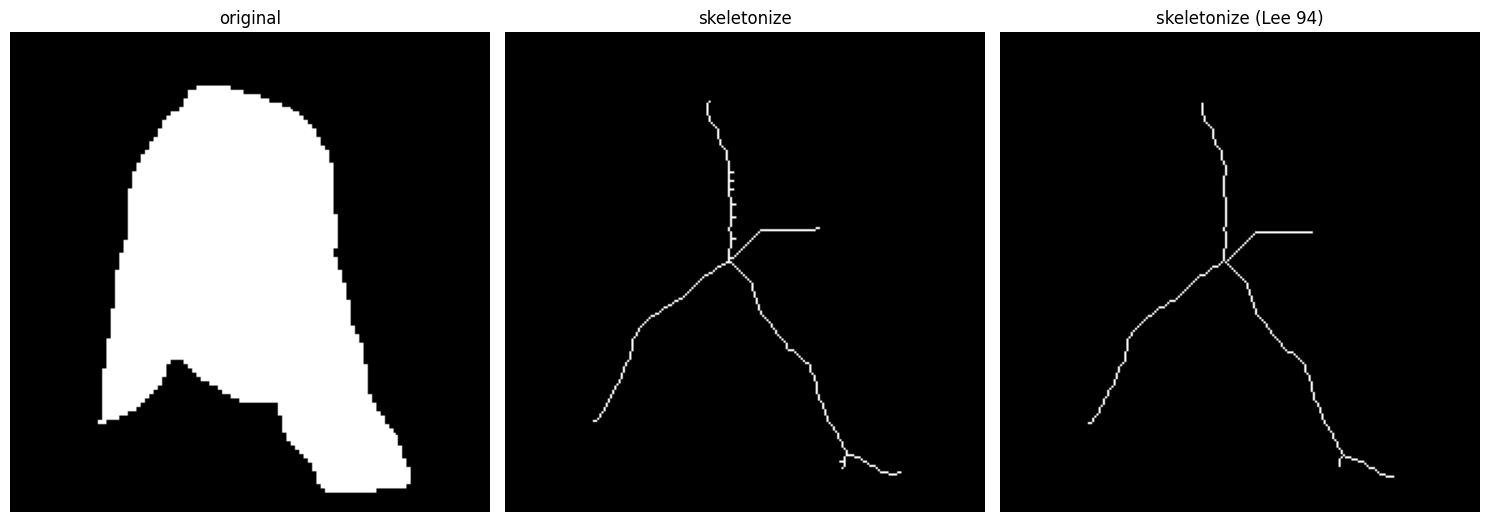

In [57]:
skeleton = skeletonize(img)
skeleton_lee = skeletonize(img, method='lee')

fig, axes = plt.subplots(1, 3, figsize=(15, 10), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(img, cmap=plt.cm.gray)
ax[0].set_title('original')
ax[0].axis('off')

ax[1].imshow(skeleton, cmap=plt.cm.gray)
ax[1].set_title('skeletonize')
ax[1].axis('off')

ax[2].imshow(skeleton_lee, cmap=plt.cm.gray)
ax[2].set_title('skeletonize (Lee 94)')
ax[2].axis('off')

fig.tight_layout()
plt.show()

In [58]:
def test_skeletonize(bn_img): # takes a binary  image where pixel values are 0 or 1 and then plot the result
    skeleton = skeletonize(bn_img)
    skeleton_lee = skeletonize(bn_img, method='lee')
    
    skel, distance = medial_axis(bn_img, return_distance=True)
    # Distance to the background for pixels of the skeleton
    dist_on_skel = distance * skel
    
    fig, axes = plt.subplots(1, 4, figsize=(15, 10), sharex=True, sharey=True)
    ax = axes.ravel()

    ax[0].imshow(bn_img, cmap=plt.cm.gray)
    ax[0].set_title('original')
    ax[0].axis('off')

    ax[1].imshow(dist_on_skel, cmap=plt.cm.gray, interpolation='nearest')
    ax[1].set_title('MAT')
    ax[1].contour(bn_img, [0.3], colors='w')
    ax[1].axis('off')

    ax[2].imshow(skeleton, cmap=plt.cm.gray)
    ax[2].set_title('Skeletonize')
    ax[2].contour(bn_img, [0.3], colors='w')
    ax[2].axis('off')

    ax[3].imshow(skeleton_lee, cmap=plt.cm.gray)
    ax[3].set_title('skeletonize (Lee 94)')
    ax[3].contour(bn_img, [0.3], colors='w')
    ax[3].axis('off')

    fig.tight_layout()
    plt.show()
def test_medial_axis(image):
    skel, distance = medial_axis(image, return_distance=True)

    # Distance to the background for pixels of the skeleton
    dist_on_skel = distance * skel

    fig, (ax1, ax3) = plt.subplots(1, 2, figsize=(8, 4))
    ax1.imshow(image, cmap=plt.cm.gray, interpolation='nearest')
    ax1.axis('off')
    
    ax3.imshow(dist_on_skel, cmap=plt.cm.gray, interpolation='nearest')
    ax3.contour(image, [0.3], colors='w')
    ax3.axis('off')

    fig.subplots_adjust(hspace=0.01, wspace=0.01, top=1, bottom=0, left=0, right=1)
    plt.show()

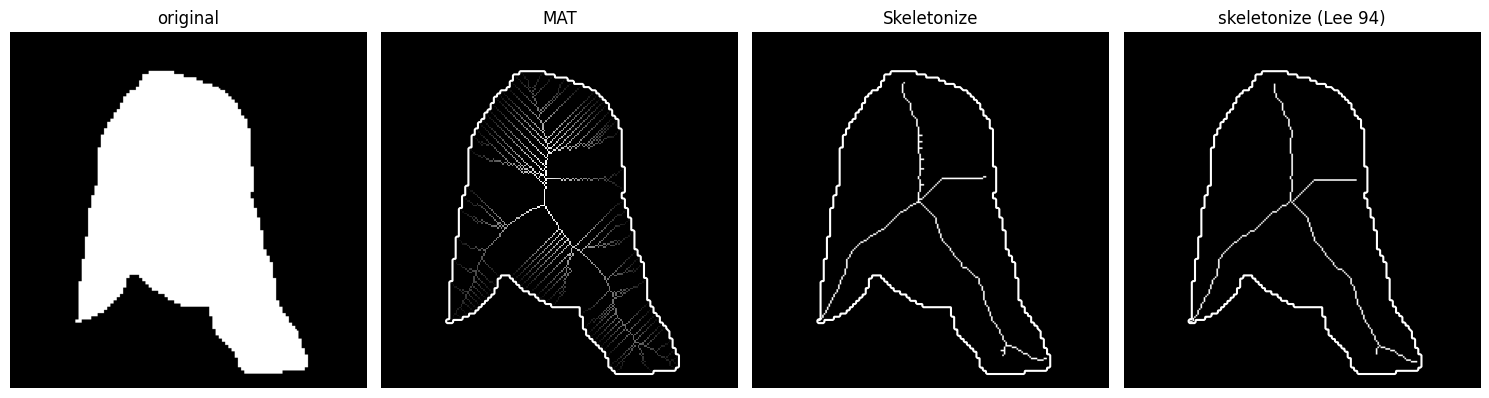

In [59]:

test_skeletonize(img)

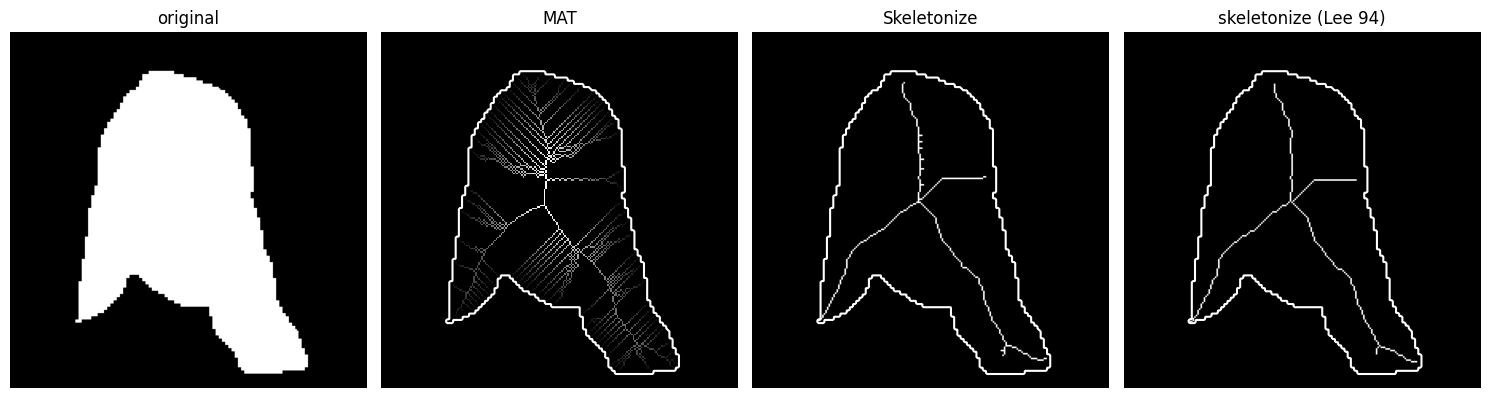

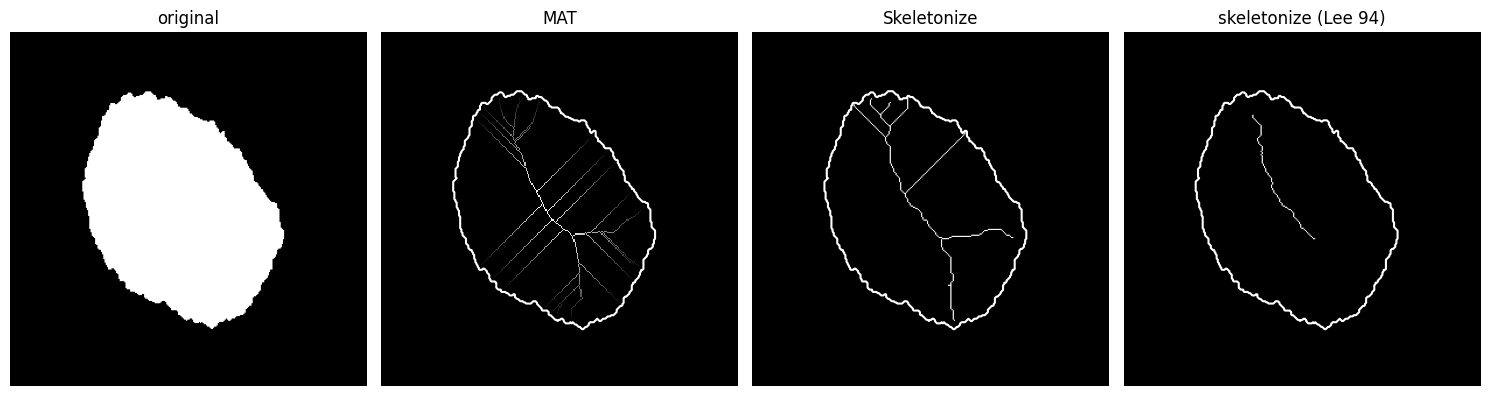

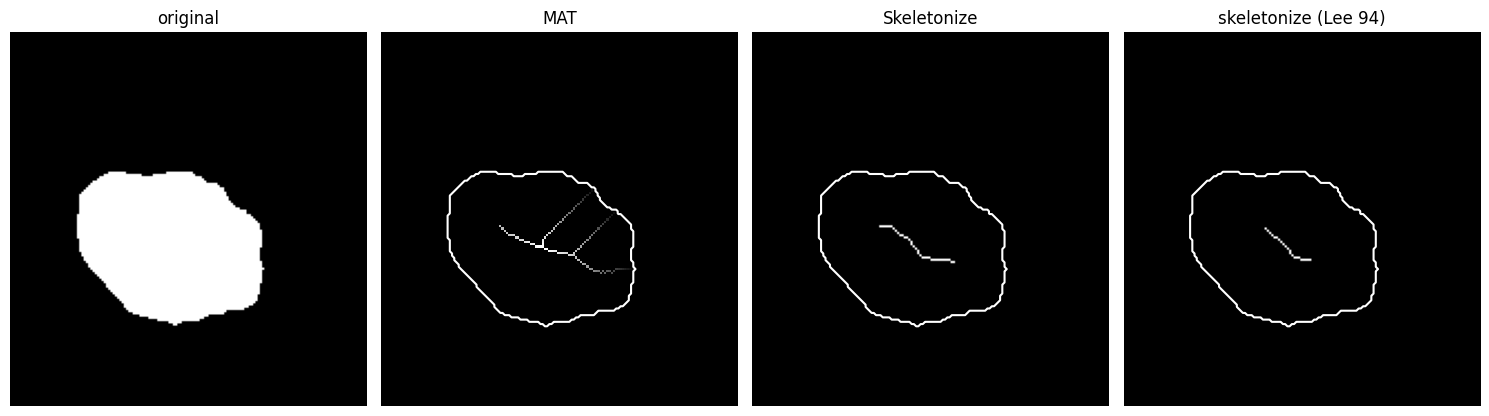

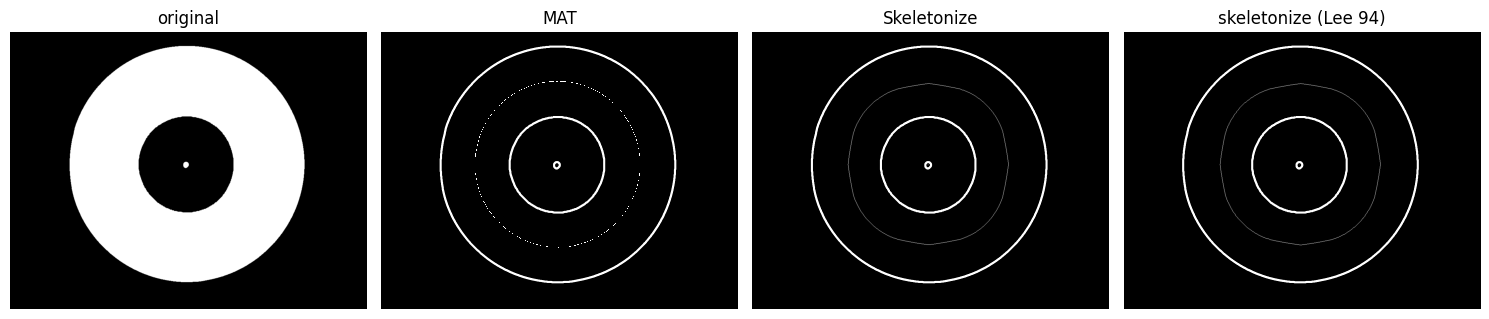

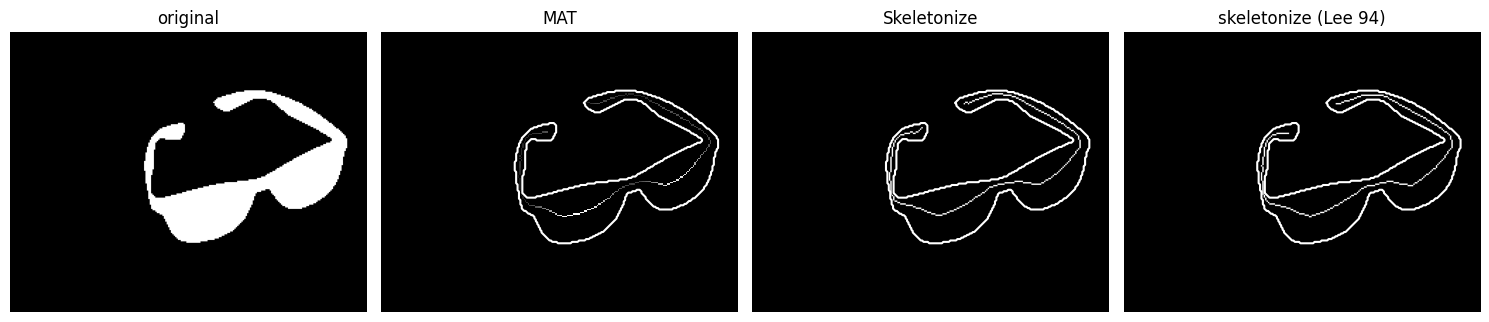

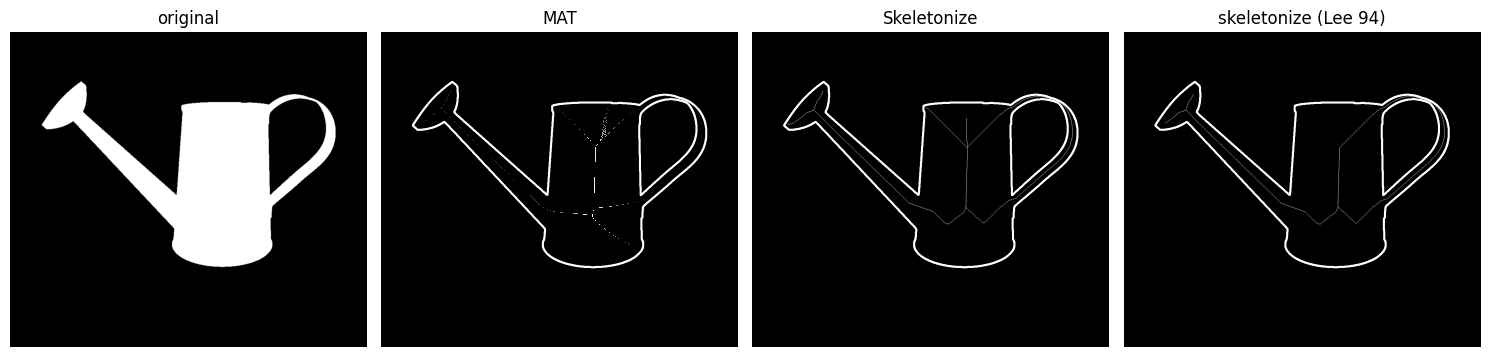

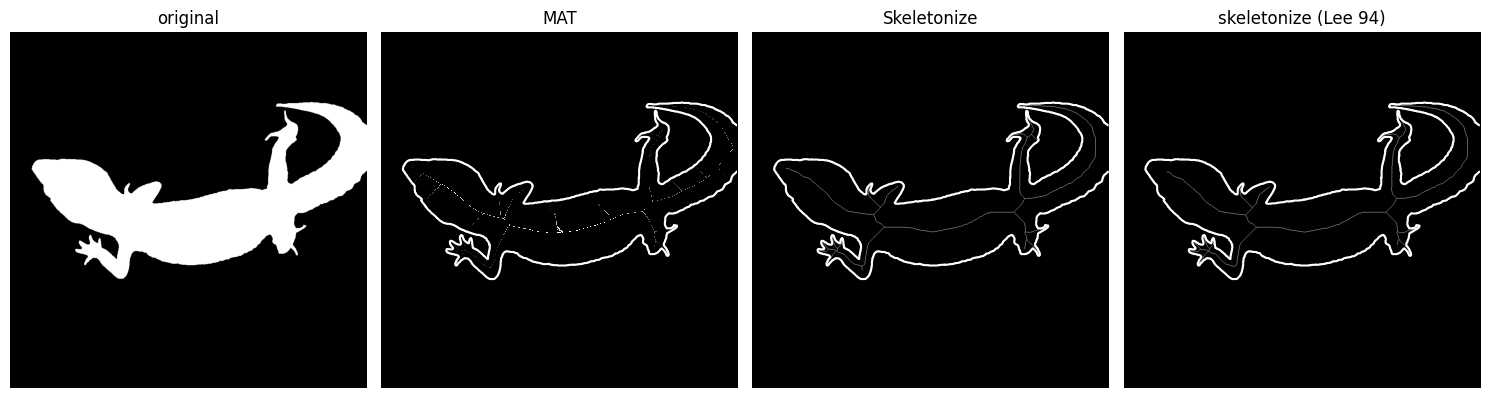

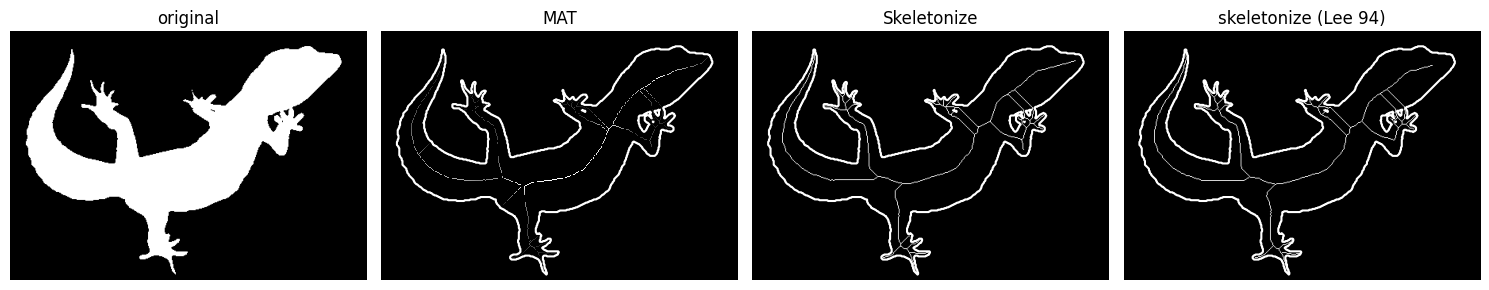

In [60]:
IMAGES_PATH = './images/test'

for image_name in os.listdir(IMAGES_PATH):
    temp_image = cv2.imread(IMAGES_PATH+'/'+image_name, 2)
    temp_image = np.where(temp_image <= 200, False, True)
    test_skeletonize(temp_image)

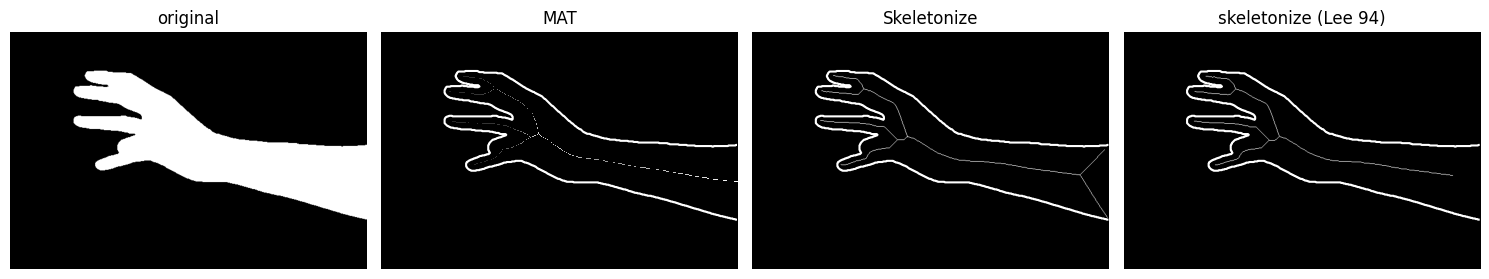

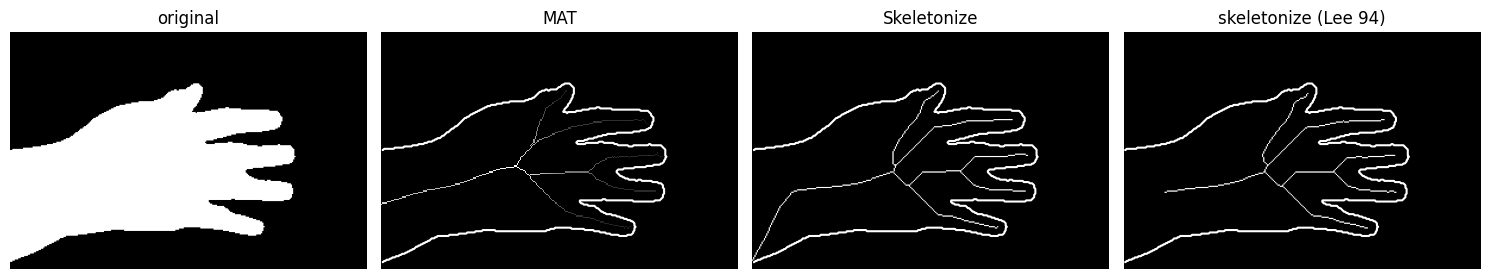

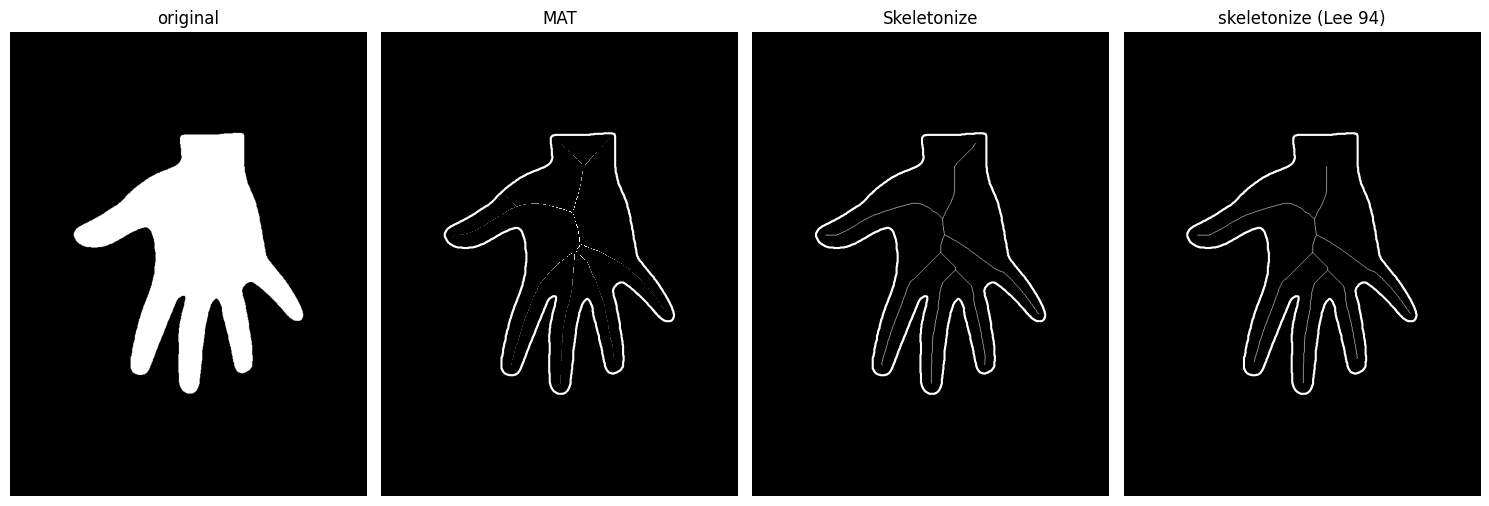

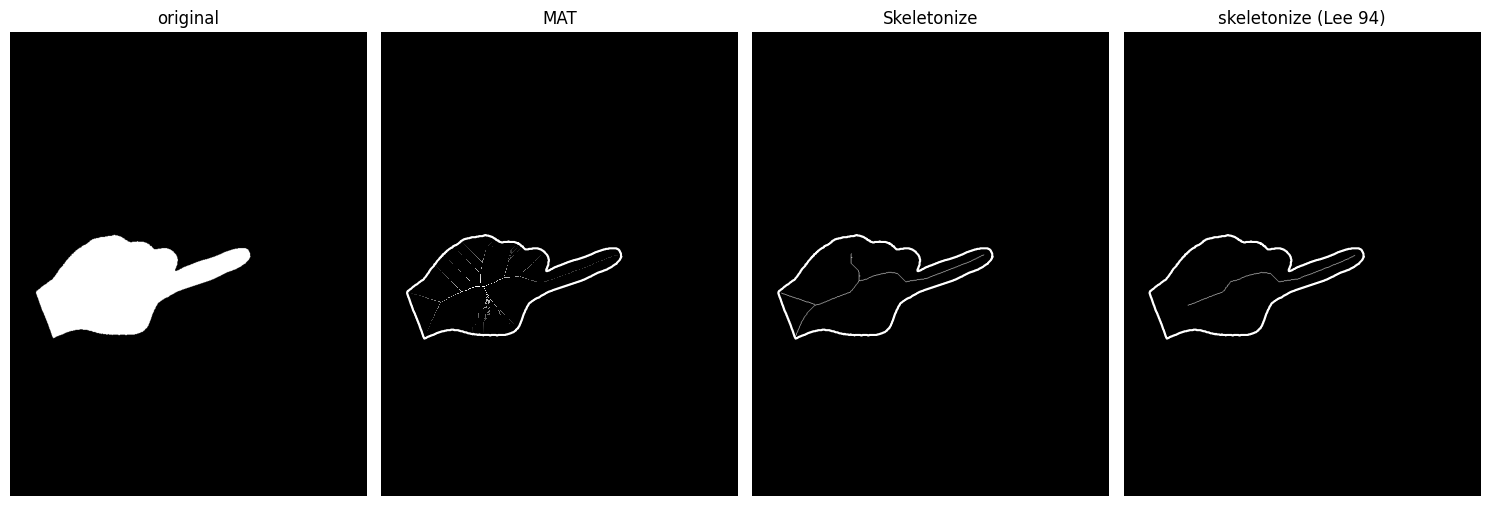

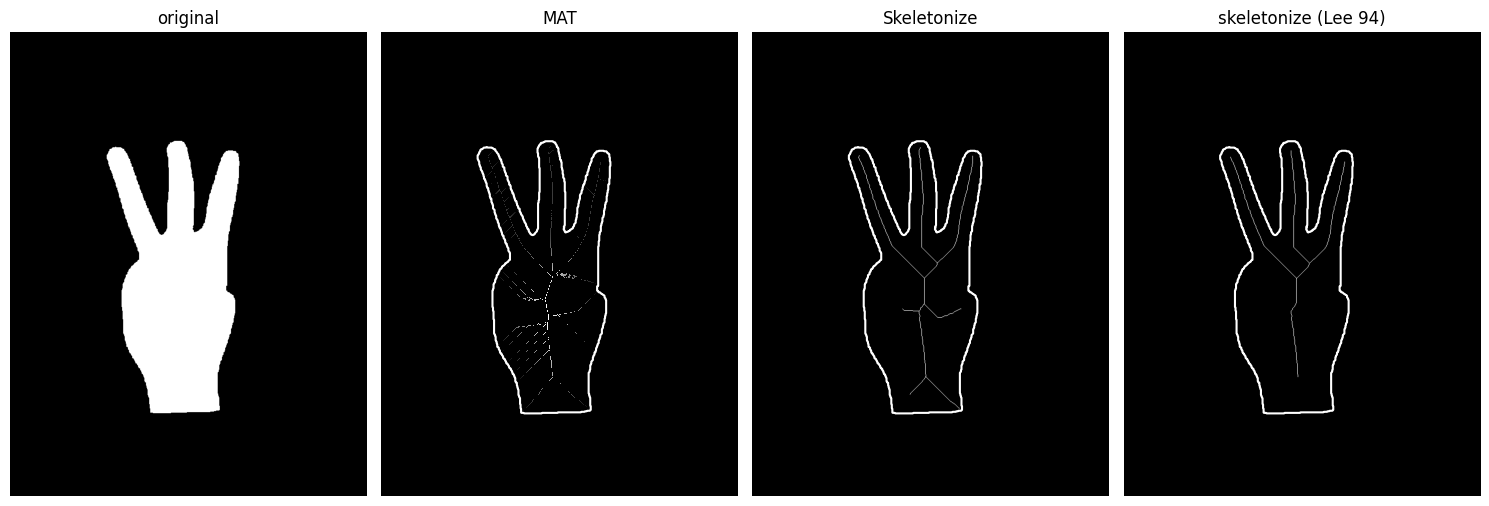

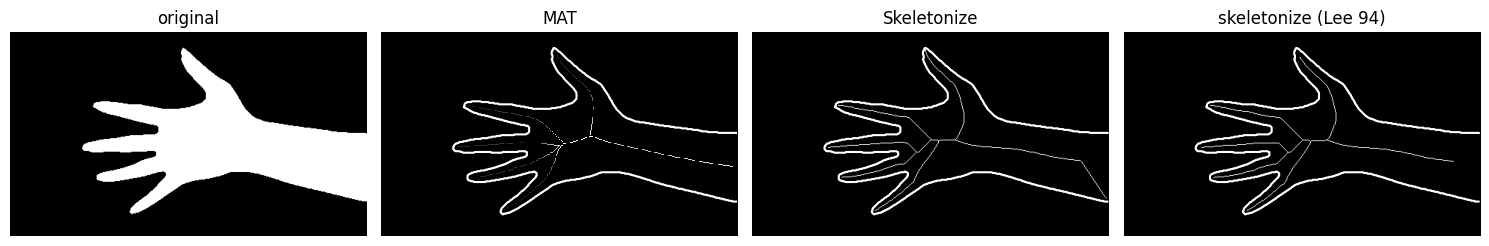

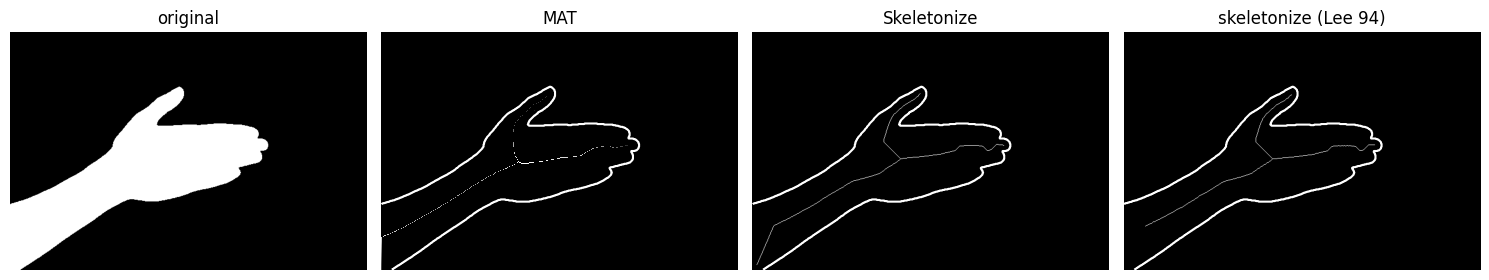

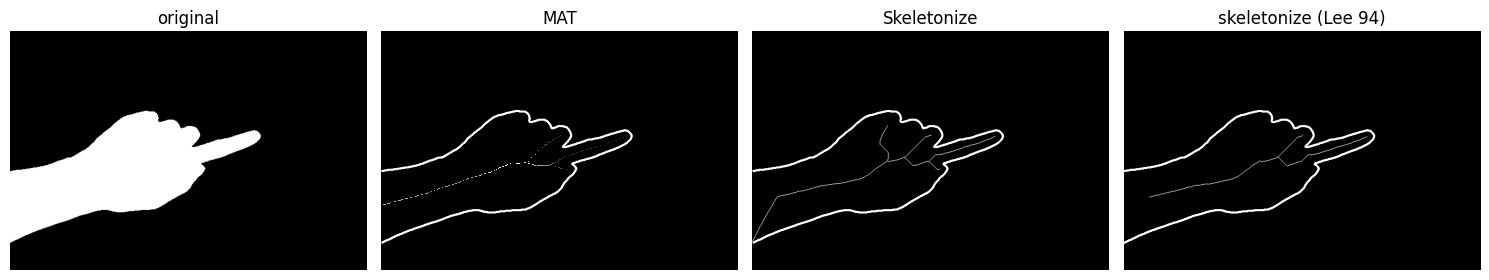

In [61]:
IMAGES_PATH_HANDS = './images/hands'

for image_name in os.listdir(IMAGES_PATH_HANDS):
    temp_image = cv2.imread(IMAGES_PATH_HANDS+'/'+image_name, 2)
    temp_image = np.where(temp_image <= 200, False, True)
    test_skeletonize(temp_image)

#### Test Indexation avec et sans Skeletisation

In [62]:
def img_skel(img):
    smooth_img = smooth_image(img)
    skeleton = skeletonize(smooth_img)  
    return skeleton

In [63]:
img_requete = cv2.imread(IMAGES_PATH_HANDS +'/'+ 'img_7.png') 
img_skel_requete = img_skel(img_requete)

In [64]:
loaded_images = list()
loaded_images_skel = list()
for filename in os.listdir(IMAGES_PATH_HANDS):
	img_data = cv2.imread(IMAGES_PATH_HANDS+'/' + filename)
	skel_data = img_skel(img_data)
	loaded_images.append(img_data)
	loaded_images_skel.append(skel_data)


In [65]:
len(loaded_images)

8

In [66]:
def hu_moments(image):
    image_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    _,image_gray = cv2.threshold(image_gray, 128, 255, cv2.THRESH_BINARY)
    moments = cv2.moments(image_gray) 
    huMoments = cv2.HuMoments(moments)
    return [hm[0] for hm in huMoments]
def CBIR_Indexation(loaded_images):
  features = []
  for img in loaded_images:
    features.append(hu_moments(img))
  return np.array(features)
def CBIR_Recherche(Imreq,ind_Matrix):
  distances = {}
  for i,img in enumerate(loaded_images):
    distances[i] = dist.euclidean( ind_Matrix[i], hu_moments(Imreq))

  distances = sorted(distances.items(), key=lambda x:x[1])
  return distances
  

In [67]:
indx_mat = CBIR_Indexation(loaded_images)
distances = CBIR_Recherche(img_requete,indx_mat)

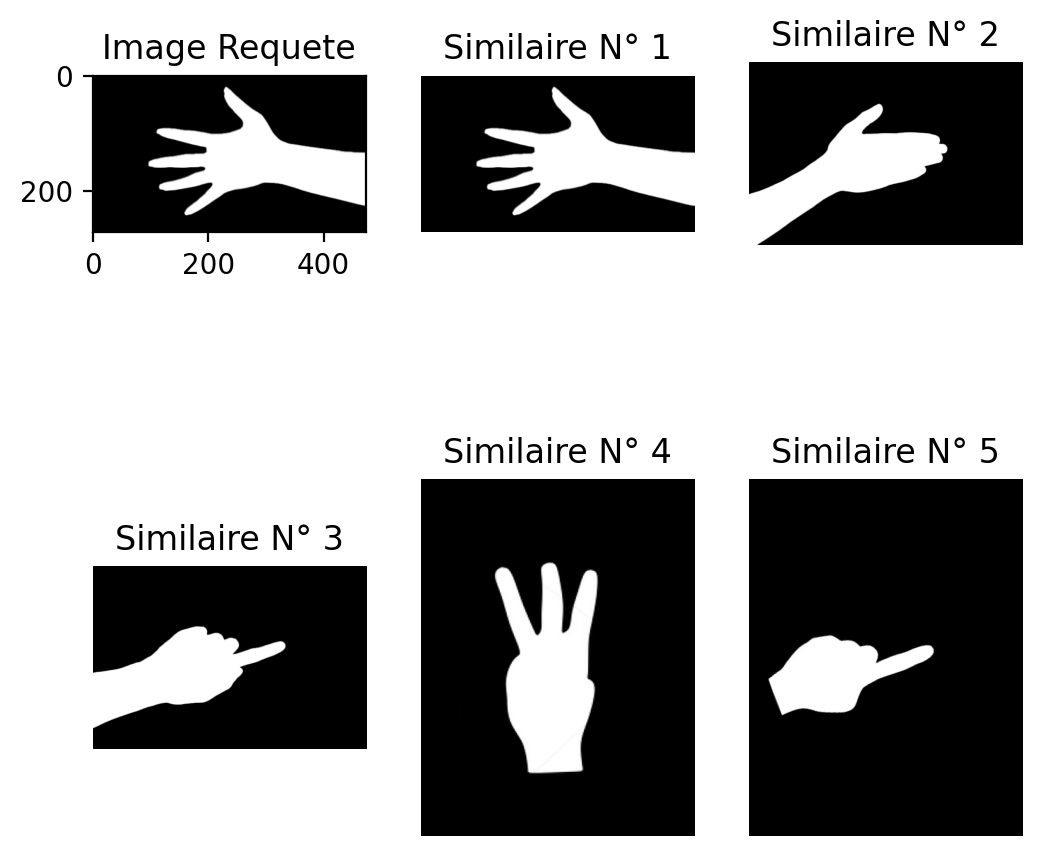

In [68]:
fig = plt.figure(figsize=(6, 6), dpi=200)
ax1 = fig.add_subplot(2, 3, 1)
ax1.imshow(img_requete)
ax1.set_title('Image Requete')
for i in range(5):
  ax1 = fig.add_subplot(2, 3, i+2)
  ax1.imshow(loaded_images[distances[i][0]])
  ax1.set_title('Similaire N° %s' %(i+1))
  ax1.axis('off')

In [69]:
indx_mat_skel = CBIR_Indexation(loaded_images_skel)
distances_skel = CBIR_Recherche(img_skel_requete,indx_mat_skel)

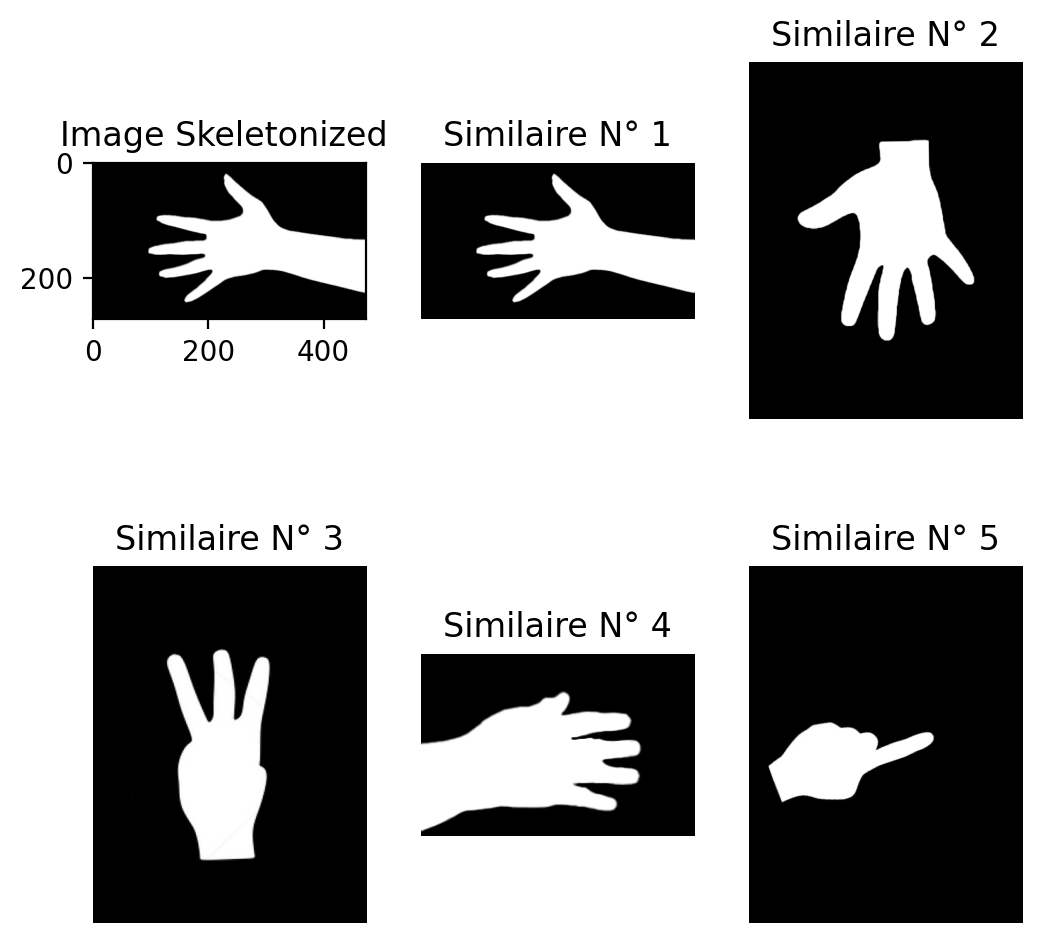

In [70]:
fig = plt.figure(figsize=(6, 6), dpi=200)
ax1 = fig.add_subplot(2, 3, 1)
ax1.imshow(img_requete)
ax1.set_title('Image Skeletonized ')
for i in range(5):
  ax1 = fig.add_subplot(2, 3, i+2)
  ax1.imshow(loaded_images[distances_skel[i][0]])
  ax1.set_title('Similaire N° %s' %(i+1))
  ax1.axis('off')